<a href="https://colab.research.google.com/github/Gainward777/yolov5_custom_training/blob/main/yolov5_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download model and dataset

In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!git clone https://github.com/Gainward777/yolov5  # clone repo
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 11468, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11468 (delta 2), reused 0 (delta 0), pack-reused 11457
Receiving objects: 100% (11468/11468), 13.24 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (7660/7660), done.
Setup complete. Using torch 1.12.1+cu113 (CPU)


In [ ]:
%pip install -qr /content/drive/MyDrive/yolo/yolov5/requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

     |████████████████████████████████| 182 kB 27.0 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 51.7 MB/s 
     |████████████████████████████████| 42 kB 725 kB/s 
     |████████████████████████████████| 138 kB 33.2 MB/s 
     |████████████████████████████████| 145 kB 64.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 178 kB 67.3 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 


In [ ]:
%cd /content/drive/MyDrive/yolo/yolov5

/content/drive/MyDrive/yolo/yolov5


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="fI73miwjJ24LMhypYxxi")
project = rf.workspace("pricecarddemo").project("numbers-sdsol")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to NUMBERS-1 in yolov5pytorch:: 100%|██████████| 417/417 [00:03<00:00, 130.67it/s]


# Train model

This is first version of dataset, and it's contains several bugs. Such as mutated classes 5 and 3 in some images, or errors in folder names in data.yaml.  This will affect the final result, but at the stage of developing a demo, this is not so significant.

To use it with this model first of all it is necessary open data.yaml in dataset folder (NUMBERS-1/data.yaml previously I downloaded it to my gdrive in a folder yolo/yolov5) change NUMBERS-1/valid/images to NUMBERS-1/test/images in line 14, becouse dataset haven't folder that called valid, but got test.

In [ ]:
!python train.py --img 416 --batch 64 --epochs 250 --data NUMBERS-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=NUMBERS-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use `git pull ultralytics master` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-26-g1c4c329 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

# Let's look at result

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source NUMBERS-1/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=NUMBERS-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/drive/MyDrive/yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-26-g1c4c329 Python-3.8.15 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients
image 1/23 /content/driv

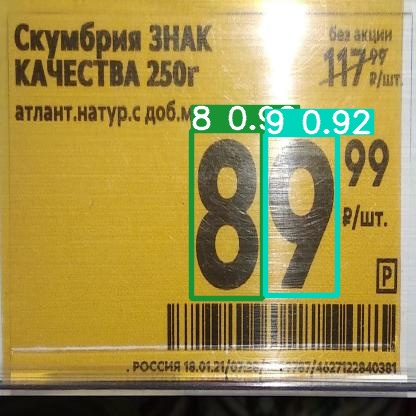

In [4]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/yolo/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    break

# Export

Export to .ptl to use it in android app with pytorch_lite for android

In [ ]:
%cd /content/drive/MyDrive/yolo/yolov5 
!python export.py --data NUMBERS-1/data.yaml --weights runs/train/exp/weights/best.pt --imgsz 416 416 --batch-size 1 --optimize --include torchscript

/content/drive/MyDrive/yolo/yolov5
export: data=NUMBERS-1/data.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[416, 416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-26-g1c4c329 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (0,) (13.7 MB)

TorchScript: starting export with torch 1.12.1+cu113...
TorchScript: export success ✅ 2.1s, saved as runs/train/exp/weights/best.torchscript.ptl (27.0 MB)

Export complete (2.7s)
Results saved to /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights runs/train/exp/weights/best.torchscript.ptl 

Test traced model

In [ ]:
import torch
import torchvision
scripted_model = torch.jit.load('/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.torchscript.ptl')

import glob
from IPython.display import Image, display
from PIL import Image

img=[]
for imageName in glob.glob('/content/drive/MyDrive/Prices/416/*.jpg'): 
    a=Image.open(imageName)
    img.append(a)    

from torchvision.transforms import ToTensor

imTens=[]
for i in img:
  im=ToTensor()(i).unsqueeze(0)  
  imTens.append(im)

result=scripted_model(imTens[3])
result

tensor([3., 9.])

We got classes have a look at image

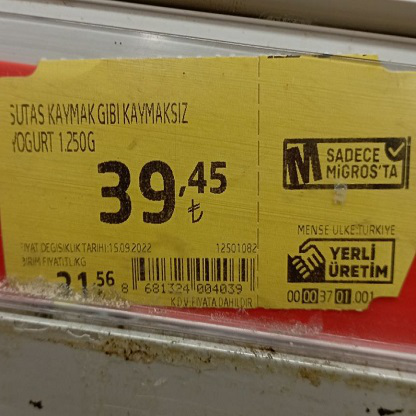

In [ ]:
img[3]